In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Máquinas con vectores de Soporte con Kernel Polinomial

In [ ]:
x = np.array([-4, -3, -2.2, -1, 0, 1,  2 , 3, 4])
y = np.array([1, 1, 0, 0 , 0 ,0 , 0, 1, 1])

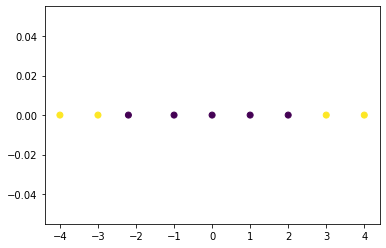

In [ ]:
plt.scatter(x, np.zeros(len(x)), c=y)
plt.show()

1- Crear una nueva variable $x_2$ para el dataset  tal que $x_2 = x_1^2$, donde $x_1$ es la variable original.
El nuevo dataset tendrá un vector de características de dos dimensiones $(x_1, x_2)$

In [ ]:
x_new = np.array([x, x**2])
x_new

array([[-4.  , -3.  , -2.2 , -1.  ,  0.  ,  1.  ,  2.  ,  3.  ,  4.  ],
       [16.  ,  9.  ,  4.84,  1.  ,  0.  ,  1.  ,  4.  ,  9.  , 16.  ]])

2- Graficar el nuevo dataset

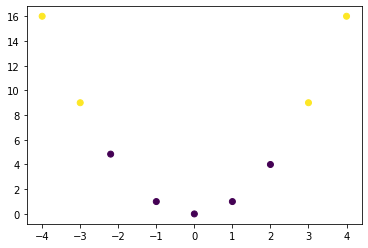

In [ ]:
plt.scatter(x_new[0], x_new[1], c=y)
plt.show()

3- El nuevo dataset es ahora linealmente separable. Encuentre manualmente una línea que maximice el margen utilizando vectores de soporte

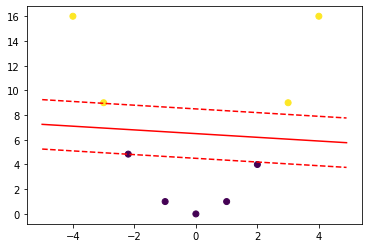

In [ ]:
x_ = np.arange(-5, 5, 0.1)
plt.scatter(x_new[0], x_new[1], c=y)
# Linea Separable
plt.plot(x_, -0.15*x_+6.5, 'r')
# Vectores de soporte
plt.plot(x_, -0.15*x_+8.5, 'r--')
plt.plot(x_, -0.15*x_+4.5, 'r--')

plt.show()

5- Entrene un SVC con kernel polinomial de grado 2 sin regularización para el dataset original(el de una sola dimensión). ¿Cuáles son los vectores se soporte encontrador? ¿Coinciden con los encontrados manualmente en el punto 4?

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='poly', degree=2, C=100000)
svc.fit(x.reshape(-1,1), y)

SVC(C=100000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.support_vectors_

array([[-2.2],
       [ 3. ]])

Los vectores de soporte encontrados manualmente son cercanos a los que se encuentran al usar sklearn.svm.SVC

# Máquinas con vectores de soporte con Kernel de funciones de base radial

In [ ]:
x = np.array([-4, -3, -2.2, -1, 0, 1,  2 , 3, 4])
y = np.array([1, 1, 0, 0 , 0 ,0 , 0, 1, 1])


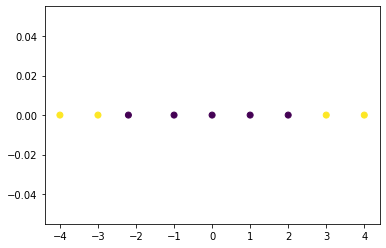

In [ ]:
plt.scatter(x, np.zeros(len(x)), c=y)
plt.show()

In [ ]:
def rbf(x, c=0, gamma=0.3):
    return np.exp(-gamma*(x - c)**2)

In [ ]:
x1 = np.arange(-5, 5, 0.1)

1 - graficar x1 vs rbf(x1)


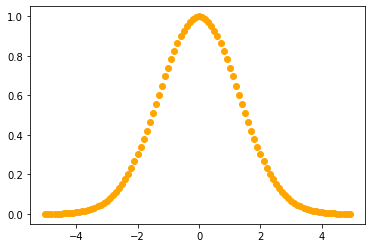

In [ ]:
plt.scatter(x1, rbf(x1), c='orange')
plt.show()

2- ¿qué ocurre cuando se varían los valores de gamma y de c?

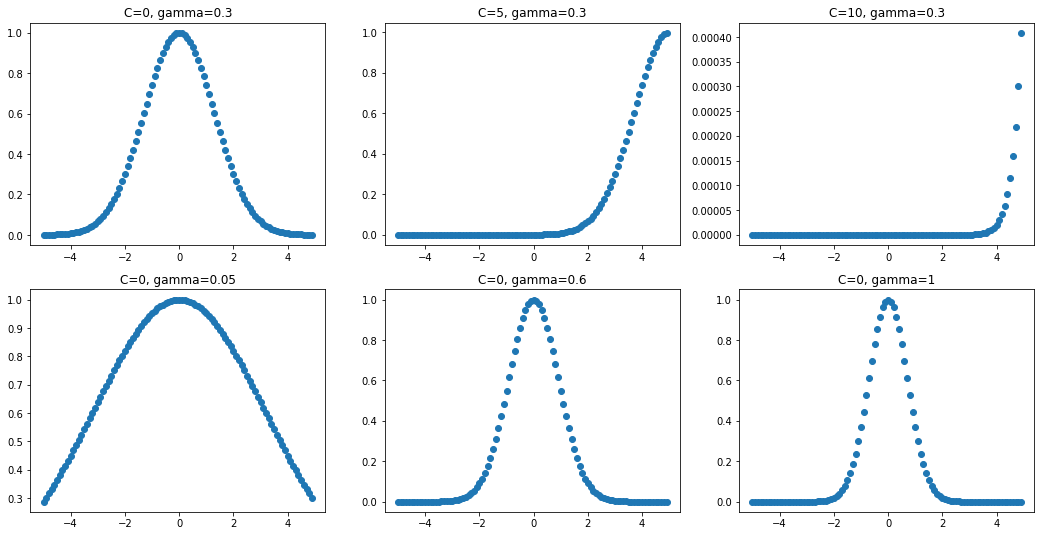

In [ ]:
plt.figure(figsize=(18,9))
plt.subplot(2,3,1)
plt.scatter(x1, rbf(x1, c=0, gamma=0.3))
plt.title('C=0, gamma=0.3')
plt.subplot(2,3,2)
plt.scatter(x1, rbf(x1, c=5, gamma=0.3))
plt.title('C=5, gamma=0.3')
plt.subplot(2,3,3)
plt.scatter(x1, rbf(x1, c=10, gamma=0.3))
plt.title('C=10, gamma=0.3')
plt.subplot(2,3,4)
plt.scatter(x1, rbf(x1, c=0, gamma=0.05))
plt.title('C=0, gamma=0.05')
plt.subplot(2,3,5)
plt.scatter(x1, rbf(x1, c=0, gamma=0.6))
plt.title('C=0, gamma=0.6')
plt.subplot(2,3,6)
plt.scatter(x1, rbf(x1, c=0, gamma=1))
plt.title('C=0, gamma=1');

A medida que aumenta el valor de $c$, se pierde la distribución normal que se forma al tomar $c$ = 0, incluso cuando ya se toma un valor alto como $c$ = 10, se pierde la dimensionalidad en el eje $y$. 

A medida que aumenta el valor de $gamma$, la amplitud de la distribución normal se va reduciendo, pero al parecer después de tomar valores de $gamma$ mayores o iguales a 0.5, esta amplitud se mantiene casi constante.

3 - Crear un nuevo dataset con las variables $(x_2, x_3)$ donde 

$x_2=rbf(x_1, c=-2, gamma=0,3)$ 



$x_3=rbf(x_1, c=1, gamma=0,3)$

$x_1$ es la variable del dataset original 

In [ ]:
x_new = np.array([rbf(x, c=-2, gamma=0.3), rbf(x, c=1, gamma=0.3)])
x_new

array([[3.01194212e-01, 7.40818221e-01, 9.88071713e-01, 7.40818221e-01,
        3.01194212e-01, 6.72055127e-02, 8.22974705e-03, 5.53084370e-04,
        2.03995034e-05],
       [5.53084370e-04, 8.22974705e-03, 4.63284053e-02, 3.01194212e-01,
        7.40818221e-01, 1.00000000e+00, 7.40818221e-01, 3.01194212e-01,
        6.72055127e-02]])

4 - graficar el nuevo dataset

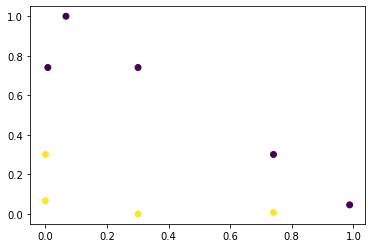

In [ ]:
plt.scatter(x_new[0], x_new[1], c=y)
plt.show()

5 - ¿qué es lo que hace la función rbf?

6 - entrenar un svc de sklearn utilizando kernel rbf sin regularización

In [ ]:
svc = SVC(kernel='rbf', C=100000)
svc.fit(x.reshape(-1,1), y)

SVC(C=100000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.support_vectors_

array([[-2.2],
       [ 2. ],
       [-3. ],
       [ 3. ]])

In [ ]:
svc.support_

array([2, 6, 1, 7], dtype=int32)